In [2]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np 
import math
from Bio.Seq import Seq

In [3]:
def windowfunc(seq1,seq2,thrsh):
	'''
	Computes whether to draw a dot or not 
	'''
	counter=0
	for i in range(len(seq1)):
		if seq1[i]==seq2[i]:
			counter+=1
	return thrsh <= counter

In [9]:
def Dot_Matrix(seq1,seq2,step,window,thrsh):
	
	'''
	    calculates the final matrix 
	'''
	indexes=[]
	
	for i in range(0,len(seq2)-window+step,step):
		for j in range(0,len(seq1)-window+step,step):
			if windowfunc(seq1[j:j+window],seq2[i:i+window], thrsh):
				final_matrix[math.ceil((i+window/2))-1][math.ceil((j+window/2))-1]=1
				indexes.append([math.ceil((i+window/2)-1),math.ceil((j+window/2))-1])
	return indexes

In [5]:
def optimal_line(arr):
	'''
    Chose the optimal line of maximum dots
	'''
	for i in range(len(arr)):
		for j in range(i,len(arr)):
			if (arr[i][1] != arr[j][1]):
				if(((arr[i][0]-arr[j][0])/(arr[i][1]-arr[j][1]))==1):
					arr[i].append(arr[j][0])
					arr[i].append(arr[j][1])
	_max=[]
	for i in arr:
		if len(i)> len(_max):
			_max=i

	return _max



In [6]:

#-------print matrix in console--------------

def print_matrix(seq1,seq2,final_matrix):
	''' prints the final dot matrix in console'''
	print(" ",end="")
	for i in seq1:
		print("",i,end="")
	print("")
	for i in range(len(final_matrix)):
		print(seq2[i],end="")
		print(final_matrix[i])


In [7]:
#------ print alignment------------
def print_alignment(seq1,seq2,line):
	''' prints the alignment in console '''
	print(" \n alignment :   ")
	if line[0]== line[1]:
		print (seq1)
		print(seq2)
	elif line[0]> line[1]:
		print(" "*(line[0]-1),end="")
		print(seq1)
		print(seq2)
	
	elif line[0]<line[1]:
		print(seq1)
		print(" "*(line[1]-1),end="")
		print(seq2)



In [8]:

#-------------- visual plot -----------------
def plot_matrix(seq1,seq2,final_matrix):
	''' plot the final dot matrix using matplot lib 
	'''
	plt.rcParams["figure.figsize"] = 4, 5
	param = {"grid.linewidth": 1.6,
	         "grid.color": "lightgray",
	         "axes.linewidth": 1.6,
	         "axes.edgecolor": "lightgray"}
	plt.rcParams.update(param)
	
	# Data
	headh = seq1
	headv = seq2
	
	v= final_matrix
	fig, ax = plt.subplots()
	ax.set_xlim(-1.5, v.shape[1] - .5)
	ax.set_ylim(-1.5, v.shape[0] - .5)
	ax.invert_yaxis()
	for i in range(v.shape[0]):
	    for j in range(v.shape[1]):
	        if v[i,j]==1:
	            ax.text(j, i, v[i, j], ha="center", va="center",bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})
	        else:
	            ax.text(j, i, v[i, j], ha="center", va="center")
	for i, l in enumerate(headh):
	    ax.text(i , -1, l, ha="center", va="center", fontweight="semibold")
	for i, l in enumerate(headv):
	    ax.text(-1, i , l, ha="center", va="center", fontweight="semibold")
	
	ax.xaxis.set_minor_locator(ticker.FixedLocator(
	    np.arange(-1.5, v.shape[1] - .5, 1)))
	ax.yaxis.set_minor_locator(ticker.FixedLocator(
	    np.arange(-1.5, v.shape[1] - .5, 1)))
	plt.tick_params(axis='both', which='both', bottom='off', top='off',
	                left="off", right="off", labelbottom='off', labelleft='off')
	ax.grid(True, which='minor')
	
	
	
	
	# draw optimal line
	ax.arrow(line[1], line[0], line[-1]-line[1],line[-2]-line[0])
	plt.show()
	

In [10]:
seq1="ACCTTGTCCAG"
seq2="ACGTACCTTTA"
final_matrix = np.zeros((len(seq2), len(seq1)), dtype=int)
indexes=Dot_Matrix(seq1,seq2,2,3,1)
line=optimal_line(indexes)

In [11]:
print_matrix(seq1,seq2,final_matrix)

  A C C T T G T C C A G
A[0 0 0 0 0 0 0 0 0 0 0]
C[0 1 0 0 0 0 0 1 0 1 0]
G[0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 1 0 0 0 0 0 0 0]
A[0 0 0 0 0 0 0 0 0 0 0]
C[0 1 0 0 0 0 0 1 0 0 0]
C[0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 1 0 1 0 0 0 1 0]
T[0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 1 0 1 0 1 0 0 0]
A[0 0 0 0 0 0 0 0 0 0 0]


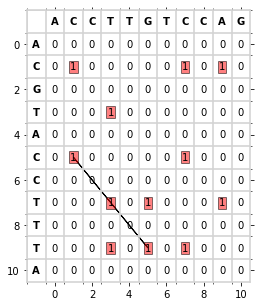

In [13]:
plot_matrix(seq1,seq2,final_matrix)

In [12]:
print_alignment(seq1,seq2,line)

 
 alignment :   
    ACCTTGTCCAG
ACGTACCTTTA


In [17]:
seq1="ACCTTGTCCTCTTTGCCC"
seq2="ACGTTGACCTGTAACCTC"
final_matrix = np.zeros((len(seq2), len(seq1)), dtype=int)
indexes=Dot_Matrix(seq1,seq2,3,9,4)
line=optimal_line(indexes)

In [18]:
print_matrix(seq1,seq2,final_matrix)

  A C C T T G T C C T C T T T G C C C
A[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
C[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
G[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
G[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
A[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
C[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
C[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
G[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
T[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
A[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
A[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
C[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
C[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
T[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
C[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
print_alignment(seq1,seq2,line)

 
 alignment :   
ACCTTGTCCTCTTTGCCC
ACGTTGACCTGTAACCTC


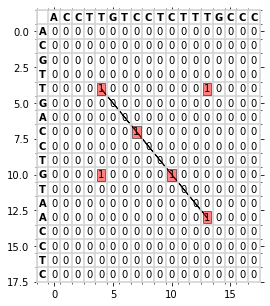

In [20]:
plot_matrix(seq1,seq2,final_matrix)